In [13]:
!pip install pandas

import pandas as pd 
import numpy as np 

import os

from IPython.display import Image, display

pd.set_option('display.max_columns',200)

pd.set_option('display.max_rows', 5)
#pd.reset_option('display.max_rows') resetea a los valores de default (10)
#pd.set_option('display.max_rows', none) Muestra todas las filas



In [14]:
#SUBO EL SET DE DATOS INDIVISUALES DEL PRIMER TRIMESTRE DE 2025
t0125 = pd.read_excel('usu_individual_T125.xlsx')

print(t0125.dtypes)

CODUSU       object
ANO4          int64
             ...   
P_IDECCF    float64
P_ADECCF    float64
Length: 235, dtype: object


In [15]:

#SUBO EL SET DE DATOS INDIVISUALES DEL PRIMER TRIMESTRE DE 2005
t0105 = pd.read_stata('Individual_t105.dta')

#VOY ANALIZANDO LOS TIPOS DE DATOS DE AMBOS DATAFRAMES. PARA ESTABLECER LAS COLUMNAS QUE REQUIEREN RECONVERSION
print(t0105.dtypes)

CODUSU         object
nro_hogar     float64
               ...   
pj3_1        category
idimpp         object
Length: 176, dtype: object


In [16]:
#PRIMERO VOY ESTABLECER LAS COLUMNAS CON LAS QUE ME VOY A QUEDAR, EN LAS 2 TABLAS

Sel_t0105 = t0105[[
'CODUSU', 'nro_hogar', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch14', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp04b_cod', 'ipcf'
]]

Sel_t0125 = t0125[[
'CODUSU', 'NRO_HOGAR', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH14', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP04B_COD', 'IPCF'
]]

#AHORA VOY ESTABLECER LAS FILAS CON LAS QUE ME VOY A QUEDAR, EN LAS 2 TABLAS
#QUE SON LA DE LOS AGLOMERADOS DE LA REGION NOA

categorias = ['Santiago del Estero - La Banda', 'Salta', 'La Rioja', 'Gran Catamarca', 'Jujuy - Palpalá','Gran Tucumán - Tafí Viejo']
Sel_t0105 = t0105[t0105['aglomerado'].isin(categorias)].copy()


categorias2 = [18,19,22,23,25,29]
Sel_t0125 = t0125[t0125['AGLOMERADO'].isin(categorias2)].copy()


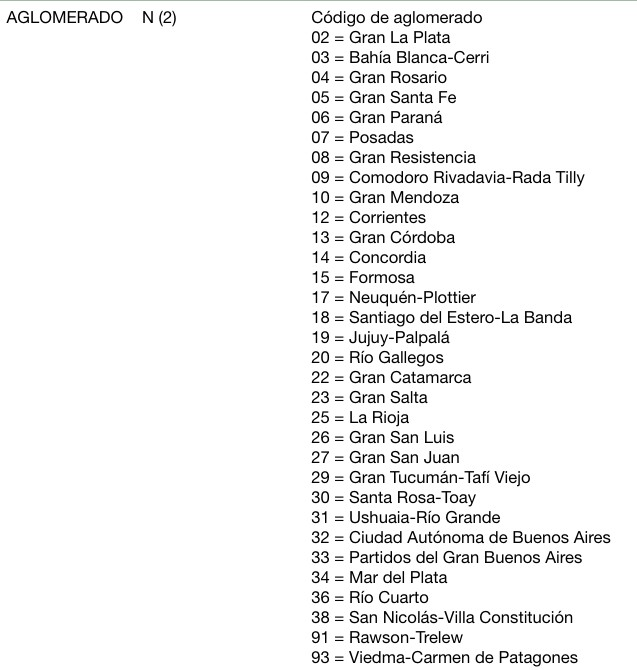

In [13]:
#Empiezo a homogeneizar las bases de datos para poder filtrar y unificarlas.


#AGLOMERADOS: Del listado me voy a quedar solo con la región NOA

display(Image(filename='C:/Users/rodol/Desktop/BDyML/Repositorio/BigDataUBA-Grupo3/TP2-Grupo3/inputs/AGLOMERADO.jpg'))



In [17]:
#EMPIEZO A RECODIFICAR LAS COLUMNAS NECESARIAS PARA QUE SE PUEDAN UNIFICAR, FINALMENTE AMBOS DATAFRAMES

# Diccionario del mapeo de los aglomerados pertenecientes al NOA
aglomerado_map = {
    'Santiago del Estero - La Banda': 18,    'Jujuy - Palpalá': 19,
    'Gran Catamarca': 22,    'Salta': 23,
    'La Rioja': 25,          'Gran Tucumán - Tafí Viejo': 29
                }
errores = []

Sel_t0105['aglomerado'] = Sel_t0105['aglomerado'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'aglomerado']
    if desc in aglomerado_map:
        Sel_t0105.at[i, 'aglomerado'] = aglomerado_map[desc]
    else:
        errores.append((i, desc))

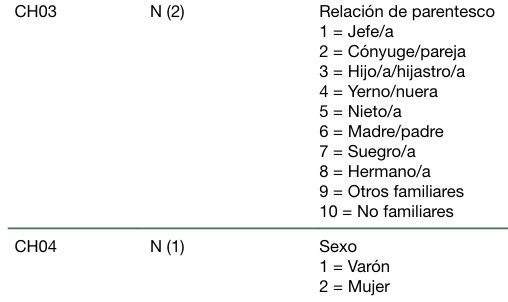

In [12]:
# repito el proceso para las siguientes columnas 

display(Image(filename=r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP2-Grupo3\inputs\GP_SEXO.jpg'))


In [18]:

#Defino el diccionario de valores que debe buscar y reemplazar
ch03_map = {
    'Jefe/a': 1,     'Jefe': 1,
    'Cónyuge/pareja': 2,    'Cónyuge/Pareja': 2,
    'Hijo/a/hijastro/a': 3,  'Hijo/Hijastro': 3,
    'Yerno/nuera': 4,        'Yerno/Nuera': 4,
    'Nieto/a': 5,            'Nieto': 5,
    'Madre/padre': 6,         'Madre/Padre': 6,
    'Suegro/a': 7,             'Suegro': 7,
    'Hermano/a': 8,              'Hermano': 8,
    'Otros familiares': 9,
    'No familiares': 10
}

errores = []

Sel_t0105['ch03'] = Sel_t0105['ch03'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'ch03']
    if desc in ch03_map:
        Sel_t0105.at[i, 'ch03'] = ch03_map[desc]
    else:
        errores.append((i, desc))

In [19]:
# tomare a la variable sexo con una Dummies, recodificandola en 0 y 1.

Sel_t0105['ch04'] = np.where(Sel_t0105['ch04'] == 'Varón', 1, 0)



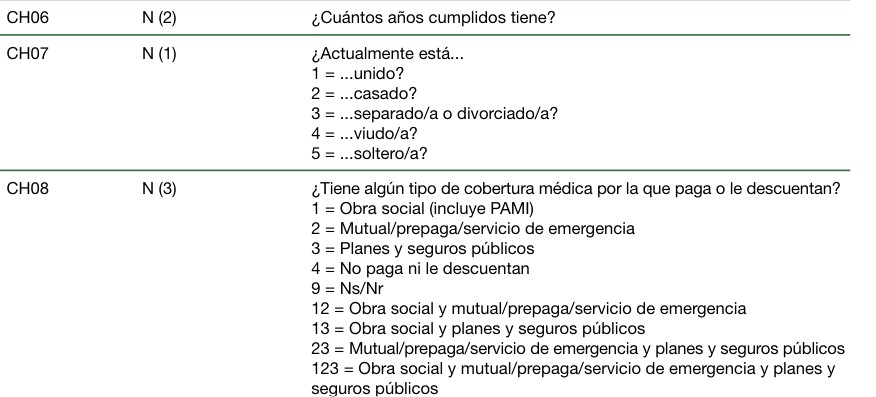

In [23]:
display(Image(filename=r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP2-Grupo3\inputs\EDAD_ECIVIL_OS.jpg'))

In [21]:
#Excluimos los valores de EDAD-ch06 fuera de rango, que son aquellos de menos de un año y los mares de 98.. Pueden ser errores de carga

Sel_t0105['ch06'] = Sel_t0105['ch06'].astype(str)

Sel_t0105 = Sel_t0105.loc[
    (Sel_t0105['ch06'] != 'Menos de 1 año') & 
    (Sel_t0105['ch06'] != '98 y más años')
]


In [23]:


ch07_map = {'Unido':1, 'Casado':2, 'Separado o divorciado':3, 'Viudo':4, 'Soltero':5  }


Sel_t0105['ch07'] = Sel_t0105['ch07'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'ch07']
    if desc in ch07_map:
        Sel_t0105.at[i, 'ch07'] = ch07_map[desc]
    else:
        errores.append((i, desc))


,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,ch03,ch04,ch06,ch07,ch08,ch09,ch10,ch11,ch12,ch13,ch14,ch15,ch15_cod,ch16,ch16_cod,nivel_ed,estado,cat_ocup,cat_inac,pp02c1,pp02c2,pp02c3,pp02c4,pp02c5,pp02c6,pp02c7,pp02c8,pp02e,pp02h,pp02i,pp03c,pp03d,pp3e_tot,pp3f_tot,pp03g,pp03h,pp03i,pp03j,intensi,pp04a,pp04b_cod,pp04b1,pp04b2,pp04b3_mes,pp04b3_ano,pp04b3_dia,pp04c,pp04c99,pp04d_cod,pp04g,pp05b2_mes,pp05b2_ano,pp05b2_dia,pp05c_1,pp05c_2,pp05c_3,pp05e,pp05f,pp05h,pp06a,pp06c,pp06d,pp06e,pp06h,pp07a,pp07c,pp07d,pp07e,pp07f1,pp07f2,pp07f3,pp07f4,pp07f5,pp07g1,pp07g2,pp07g3,pp07g4,pp07g_59,pp07h,pp07i,pp07j,pp07k,pp08d1,pp08d4,pp08f1,pp08f2,pp08j1,pp08j2,pp08j3,pp09a,pp09a_esp,pp09b,pp09c,pp09c_esp,pp10a,pp10c,pp10d,pp10e,pp11a,pp11b_cod,pp11b1,pp11b2_mes,pp11b2_ano,pp11b2_dia,pp11c,pp11c99,pp11d_cod,pp11g_ano,pp11g_mes,pp11g_dia,pp11l,pp11l1,pp11m,pp11n,pp11o,pp11p,pp11q,pp11r,pp11s,pp11t,p21,decocur,idecocur,rdecocur,gdecocur,pdecocur,adecocur,tot_p12,p47t,decindr,idecindr,rdecindr,gdecindr,pdecindr,adecindr,v2_m,v3_m,v4_m,v5_m,v8_m,v9_m,v10_m,v11_m,v12_m,v18_m,v19_am,v21_m,t_vi,itf,decifr,idecifr,rdecifr,gdecifr,pdecifr,adecifr,ipcf,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp,ch07_int
9484,125666,1.0,1.0,Sí,2005.0,1er. Trimestre,NOA,N,18,301.0,1,1,36.0,1,No paga ni le descuentan,Sí,"No asiste, pero asistió",0.0,Secundario,No,02,En esta localidad,,En esta localidad,,Secundaria Incompleta,Ocupado,Obrero o empleado,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...un sólo empleo/ocupación/actividad?,0.0,46.0,0.0,Sí,...podía trabajarlas esa semana?,Sí,Sí,Sobreocupación horaria,...privada?,9201,2.0,0.0,0.0,0.0,0.0,de 6 a 10 personas,0.0,72313,En un local/oficina/establecimiento/negocio/ta...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Más de 1 a 5 años,Ns./Nr.,Ns./Nr.,Ninguno de estos,No,No,No,No,Si,No,No,No,No,5.0,No,No,...de día? (mañana/tarde),...no le dan ni entrega nada?,300.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,...,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,03,04,04,,04,05,0.0,400.0,04,05,05,,05,06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,700.0,04,05,05,,05,05,140.0,02,03,04,,03,04,0.0,0.0,0.0,00000,1.0
9485,125666,1.0,2.0,Sí,2005.0,1er. Trimestre,NOA,N,18,301.0,2,0,35.0,1,No paga ni le descuentan,Sí,"No asiste, pero asistió",0.0,Primario,Sí,,En otra localidad,,En esta localidad,,Primaria Completa,Inactivo,0.0,Ama de casa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,,,0.0,0.0,00,00,00,,00,00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,700.0,04,05,05,,05,05,140.0,02,03,04,,03,04,0.0,0.0,0.0,00000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,288077,1.0,3.0,0.0,2005.0,1er. Trimestre,NOA,S,29,555.0,3,1,4.0,5,Obra social (incluye PAMI),No,Nunca asistió,0.0,0.0,0.0,,En esta localidad,,No había nacido,,Sin instrucción,Menor de 10 años,0.0,Menor de 6 años,0.0,0.0,0

In [24]:

ch08_map = {
'Obra social (incluye PAMI)':1, 'Mutual/Prepaga/Servicio de emergencia':2, 'Planes y seguros públicos':3, 'No paga ni le descuentan':4, 'Ns./Nr.':9, 
'Obra social y mutual/prepaga/servicio de emergencia':12, 'Obra social y planes y seguros públicos':13, 
'Mutual /prepaga / servicio de emergencia / Planes y Seguros Públicos':23, 
'Obra social, mutual / prepaga / servicio de emergencia y Planes y Seguros Públicos':123
}

Sel_t0105['ch08'] = Sel_t0105['ch08'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'ch08']
    if desc in ch08_map:
        Sel_t0105.at[i, 'ch08'] = ch08_map[desc]
    else:
        errores.append((i, desc))




In [34]:
#Primero lo llevo a string para despues llevarlo a numerico al campo del ultimo curso aprobado

Sel_t0105['ch14'] = Sel_t0105['ch14'].str.strip()

Sel_t0105['ch14'] = pd.to_numeric(Sel_t0105['ch14'], errors='coerce')




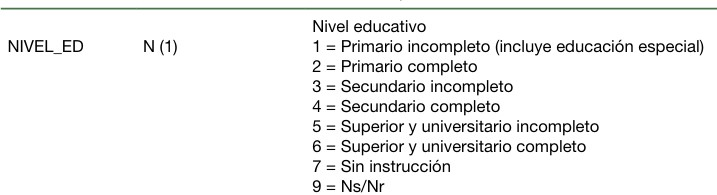

In [16]:
display(Image(filename=r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP2-Grupo3\inputs\N_EDUC.jpg'))

In [26]:

nivel_ed_map = {'Primaria Completa':2, 'Primaria Incompleta (incluye educación especial)':1, 'Secundaria Completa':4, 
            'Secundaria Incompleta':3, 'Sin instrucción':7, 'Superior Universitaria Completa':6, 
            'Superior Universitaria Incompleta':5, 'Ns/Nr':9
           }

Sel_t0105['nivel_ed'] = Sel_t0105['nivel_ed'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'nivel_ed']
    if desc in nivel_ed_map:
        Sel_t0105.at[i, 'nivel_ed'] = nivel_ed_map[desc]
    else:
        errores.append((i, desc))



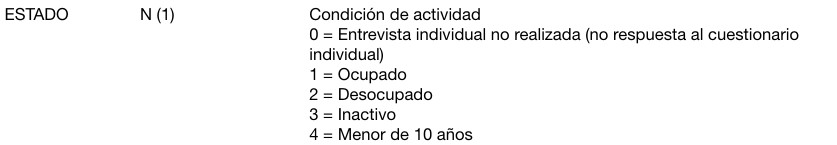

In [20]:
display(Image(filename=r"C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP2-Grupo3\inputs\EST_LABORAL.jpg"))

In [27]:

estado_map = {'Entrevista individual no realizada (no respuesta al cuestion':0, 
                'Ocupado':1, 'Desocupado':2, 'Inactivo':3, 'Menor de 10 años':4
               }

Sel_t0105['estado'] = Sel_t0105['estado'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'estado']
    if desc in estado_map:
        Sel_t0105.at[i, 'estado'] = estado_map[desc]
    else:
        errores.append((i, desc))

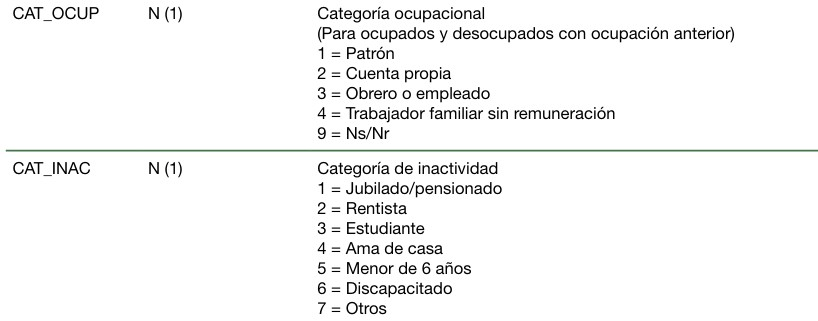

In [23]:
display(Image(filename=r"C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP2-Grupo3\inputs\OCUP_DESOCUP.jpg"))

In [28]:
cat_ocup_map = {'0':0, 'Patrón':1, 'Cuenta propia':2, 'Obrero o empleado':3,
              'Trabajador familiar sin remuneración':4,'Nr/Nr':9
             }

errores = []

Sel_t0105['cat_ocup'] = Sel_t0105['cat_ocup'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'cat_ocup']
    if desc in cat_ocup_map:
        Sel_t0105.at[i, 'cat_ocup'] = cat_ocup_map[desc]
    else:
        errores.append((i, desc))

In [29]:
cat_inac_map = {'0':0, 'Ama de casa':4, 'Discapacitado':6, 'Estudiante':3, 'Jubilado/pensionado':1, 
                'Menor de 6 años':5, 'Otros':7, 'Rentista':2
                 }

Sel_t0105['cat_inac'] = Sel_t0105['cat_inac'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'cat_inac']
    if desc in cat_inac_map:
        Sel_t0105.at[i, 'cat_inac'] = cat_inac_map[desc]
    else:
        errores.append((i, desc))

In [40]:
#Ahora uno a las 2 bases de datos individuales

sel_indiv=pd.concat([Sel_t0125,Sel_t0105], axis=1)


In [41]:
sel_indiv

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,CH03,CH04,CH05,CH06,CH07,CH08,CH09,CH10,CH11,CH12,CH13,CH14,CH15,CH15_COD,CH16,CH16_COD,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC,IMPUTA,PP02C1,PP02C2,PP02C3,PP02C4,PP02C5,PP02C6,PP02C7,PP02C8,PP02E,PP02H,PP02I,PP03C,PP03D,PP3E_TOT,PP3F_TOT,PP03G,PP03H,PP03I,PP03J,INTENSI,PP04A,PP04B_COD,PP04B1,PP04B2,PP04B3_MES,PP04B3_ANO,PP04B3_DIA,PP04C,PP04C99,PP04D_COD,PP04G,PP05B2_MES,PP05B2_ANO,PP05B2_DIA,PP05C_1,PP05C_2,PP05C_3,PP05E,PP05F,PP05H,PP06A,PP06C,PP06D,PP06E,PP06H,PP07A,PP07C,PP07D,PP07E,PP07F1,PP07F2,PP07F3,PP07F4,PP07F5,PP07G1,PP07G2,PP07G3,PP07G4,PP07G_59,PP07H,PP07I,PP07J,PP07K,PP08D1,PP08D4,PP08F1,PP08F2,PP08J1,PP08J2,...,V8_M,V9_M,V10_M,V12_M,V18_M,V19_AM,T_VI,ITF,DECIFR,IDECIFR,RDECIFR,GDECIFR,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,V2_02_M,V2_03_M,V5_03_M,V11_02_M,PP07B1_01,EMPLEO,SECTOR,PP02A,PP02B,PP02D,PP02F,PP02G,PP03K,PP04A1,PP05B3,PP05I,PP05J,PP05K,PP06E1,PP06K,PP06K_SEM,PP06K_MES,PP06L,PP07F1_1,PP07F1_2,PP07F1_3,PP07I2,PP07I3,PP07I4,PP07L,PP07M,PP08G,PP08G_DSEM,PP08G_DMES,PP08H,PP10B1,PP10B2,PP10B3,PP10B4,PP10B5,PP10B6,PP10B7,PP10B8,PP10B9,PP10B10,PP11L2,V2_01_M,V5_01_M,V5_02_M,V11_01_M,V21_01_M,V21_02_M,V21_03_M,V22_01_M,V22_02_M,V22_03_M,P_DECCF,P_RDECCF,P_GDECCF,P_PDECCF,P_IDECCF,P_ADECCF,CODUSU,nro_hogar,aglomerado,pondera,ch03,ch04,ch06,ch07,ch08,ch14,nivel_ed,estado,cat_ocup,cat_inac,pp04b_cod,ipcf
31,TQRMNORWTHJOKOCDEGPDJ00875828,2025.0,1.0,1.0,1.0,1.0,40.0,N,19.0,200.0,1.0,2.0,1951-07-14 00:00:00,73.0,5.0,1.0,1.0,2.0,0.0,2.0,1.0,NaN,1.0,NaN,1.0,NaN,2.0,3.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,780000.0,1590000.0,7.0,7.0,8.0,NaN,7.0,8.0,198750.0,2.0,2.0,2.0,NaN,2.0,2.0,198.0,220000.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280000.0,0.0,0.0,0.0,140000.0,0.0,0.0,70000.0,70000.0,0.0,3.0,3.0,NaN,3.0,3.0,3.0,126449,1.0,Ciudad de Buenos Aires,1106.0,Hijo/Hijastro,Varón,10.0,Soltero,No paga ni le descuentan,04,Primaria Incompleta (incluye educación especial),Inactivo,0.0,Estudiante,,200.0
32,TQRMNORWTHJOKOCDEGPDJ00875828,2025.0,1.0,1.0,2.0,1.0,40.0,N,19.0,200.0,3.0,2.0,1986-09-19 00:00:00,38.0,5.0,1.0,1.0,2.0,0.0,4.0,1.0,NaN,1.0,NaN,1.0,NaN,4.0,1.0,3.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,15.0,0.0,2.0,0.0,1.0,2.0,2.0,2.0,9700.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,55313.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,5.0,2.0,2.0,1.0,4.0,150000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1590000.0,7.0,7.0,8.0,NaN,7.0,8.0,198750.0,2.0,2.0,2.0,NaN,2.0,2.0,198.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,NaN,3.0,3.0,3.0,126768,2.0,Ciudad de Buenos Aires,1317.0,Jefe,Varón,47.0,Separado o divorciado,Obra social (incluye PAMI),03,Superior Universitaria Incompleta,Ocupado,Obrero o empleado,0.0,3300,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,